# 读取对应的npy

In [3]:
import numpy as np

arr = np.load('/date/NMI/data/visualVisium_mouse_brain/Visium_mouse_brain_spatial_transcriptomics_stitched.npy')

print("Shape : " , arr.shape)

Shape :  (78, 78, 32285)


# 取出对第二维度平均

In [6]:
arr_avg = np.mean(arr,axis=2)

print("arr_avg shape : " , arr_avg.shape)

arr_avg_channel = np.mean(arr_avg , axis = 1)

print("arr_avg_channel shape :" , arr_avg_channel.shape)



arr_avg shape :  (78, 78)
arr_avg_channel shape : (78,)


# LWHM 计算

In [7]:
def calculate_lwhm(intensity_values):
    peak_intensity = np.max(intensity_values)
    peak_index = np.argmax(intensity_values)
    
    half_max_intensity = peak_intensity / 2
 
    left_index = peak_index
    while left_index > 0 and intensity_values[left_index] > half_max_intensity:
        left_index -= 1
    
    lwhm = peak_index - left_index

    return lwhm,peak_index,left_index


lwhm,peak_index,left_index = calculate_lwhm(arr_avg_channel)

print(lwhm)

19


# 6个数据集的计算

In [ ]:
def calculate_lwhm(intensity_values):
    peak_intensity = np.max(intensity_values)
    peak_index = np.argmax(intensity_values)
    
    half_max_intensity = peak_intensity / 2
 
    left_index = peak_index
    while left_index > 0 and intensity_values[left_index] > half_max_intensity:
        left_index -= 1
    
    lwhm = peak_index - left_index

    return lwhm,peak_index,left_index

dataset_list = [
    '/date/NMI/data/FinalDatabase/Visium_mouse_brain' ,
    '/date/NMI/data/FinalDatabase/Visiumhdmousebrain4_8' ,
    '/date/NMI/data/FinalDatabase/Xenium5K_frozenmousebrain' ,
    '/date/NMI/data/FinalDatabase/BMKS1000_output1' ,
    '/date/NMI/data/FinalDatabase/Visium_mouse_brain_CytAssist' ,
    '/date/NMI/data/FinalDatabase/Xenium_mouse_brain'
]

patch_list = [
    ['1_1','1_2','2_1','2_2'],
    ['1_0','1_1','2_0','2_1'],
    ['2_0','2_1','3_0','3_1'],
    ['2_1','2_2','3_1','3_2'],
    ['2_4','2_5','3_4','3_5'],
    ['3_0','3_1','4_0','4_1'],
]

import os
import numpy as np
from scipy.sparse import load_npz


for i in range (len(dataset_list)) :
    lwhm_list = []

    for j in range (0,4):
        
        print(dataset_list[i])

        npz_path = None
        if os.path.exists(os.path.join(dataset_list[i],"HR_ST")):
            npz_path = os.path.join(dataset_list[i],"HR_ST")
            for subdir in os.listdir(npz_path):
                subdir_path = os.path.join(npz_path, subdir)
                
                for subsubdir in os.listdir(subdir_path):
                    subsubdir_path = os.path.join(subdir_path, subsubdir)

                    npz_path = os.path.join(subsubdir_path,patch_list[i][j],"HR_ST_256.npz")
        else :
            npz_path = os.path.join(dataset_list[i],"spot_ST")
            for subdir in os.listdir(npz_path):
                subdir_path = os.path.join(npz_path, subdir)
                
                for subsubdir in os.listdir(subdir_path):
                    subsubdir_path = os.path.join(subdir_path, subsubdir)

                    npz_path = os.path.join(subsubdir_path,patch_list[i][j],"spot_ST.npz")

        npz_file = load_npz(npz_path)

        npz = npz_file.toarray()  # 转为密集矩阵 
        print(" data shape:", npz.shape)

        reshaped_npy = None
        if os.path.exists(os.path.join(dataset_list[i],"HR_ST")):
            reshaped_npy = npz.reshape(256,256,-1)
        else :
            reshaped_npy = npz.reshape(26,26,-1)
        print(" data shape:", reshaped_npy.shape)

        now_arr = reshaped_npy

        print(f"Shape {i} : " , now_arr.shape)

        arr_avg = np.mean(now_arr,axis=2)

        print("arr_avg shape : " , arr_avg.shape)

        arr_avg_channel = np.mean(arr_avg , axis = 1)

        print("arr_avg_channel shape :" , arr_avg_channel.shape)

        lwhm,peak_index,left_index = calculate_lwhm(arr_avg_channel)

        print(lwhm)

        lwhm_list.append(lwhm)

    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 6))
    plt.boxplot([lwhm_list], labels=['mousebrain'])

    # Set plot title and labels
    plt.title("LWHM in different mouse brain")
    plt.ylabel("LWHM")

    # Show the plot
    plt.show()

    # Save the box plot as an image
    plt.savefig(f'/date/NMI/data/mouse_brain_lwhm_patch{i}.png')
    plt.close()

# 6个平台的箱型图

Processing /date/NMI/data/FinalDatabase/Visium_mouse_brain, patch 1_1
Data shape: (676, 32285)
Reshaped data shape: (26, 26, 32285)
Shape 0 :  (26, 26, 32285)
Processing /date/NMI/data/FinalDatabase/Visium_mouse_brain, patch 1_2
Data shape: (676, 32285)
Reshaped data shape: (26, 26, 32285)
Shape 0 :  (26, 26, 32285)
Processing /date/NMI/data/FinalDatabase/Visium_mouse_brain, patch 2_1
Data shape: (676, 32285)
Reshaped data shape: (26, 26, 32285)
Shape 0 :  (26, 26, 32285)
Processing /date/NMI/data/FinalDatabase/Visium_mouse_brain, patch 2_2
Data shape: (676, 32285)
Reshaped data shape: (26, 26, 32285)
Shape 0 :  (26, 26, 32285)
Processing /date/NMI/data/FinalDatabase/Visiumhdmousebrain4_8, patch 1_0
Data shape: (65536, 8049)
Reshaped data shape: (256, 256, 8049)
Shape 1 :  (256, 256, 8049)
Processing /date/NMI/data/FinalDatabase/Visiumhdmousebrain4_8, patch 1_1
Data shape: (65536, 8049)
Reshaped data shape: (256, 256, 8049)
Shape 1 :  (256, 256, 8049)
Processing /date/NMI/data/FinalDat

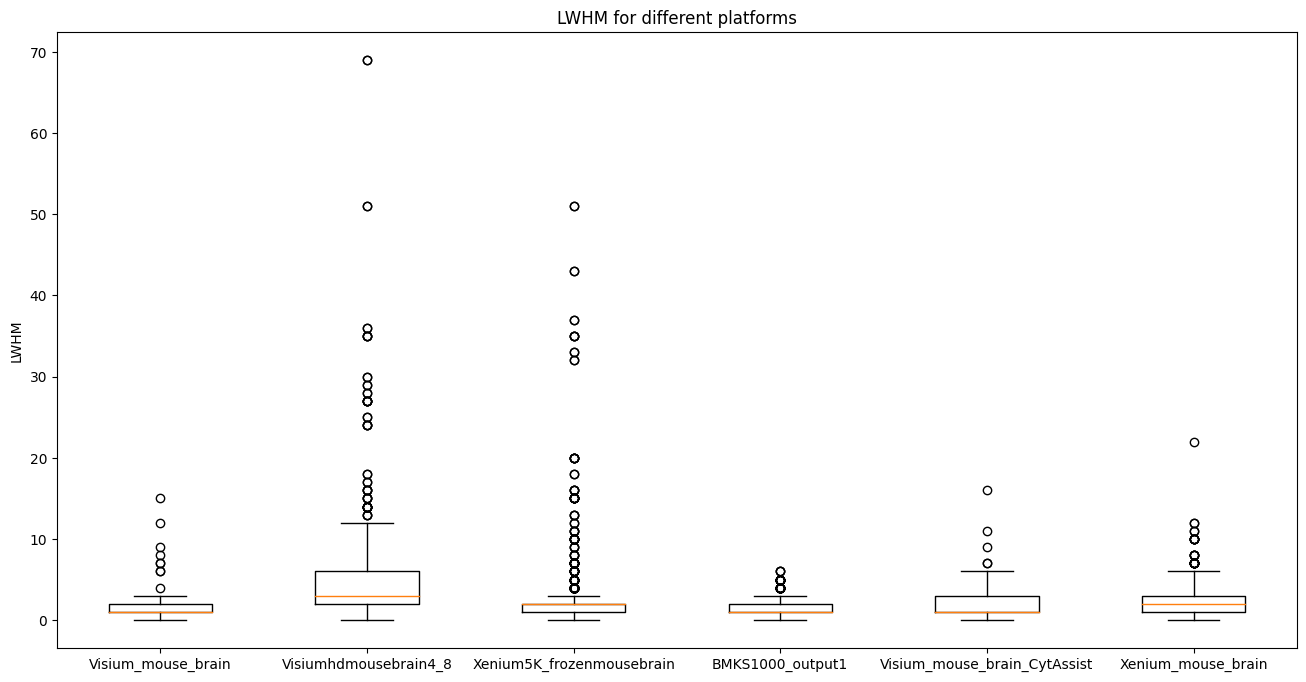

In [13]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import load_npz

# Calculate LWHM for each row
def calculate_lwhm(intensity_values):
    peak_intensity = np.max(intensity_values)
    peak_index = np.argmax(intensity_values)
    
    half_max_intensity = peak_intensity / 2
 
    left_index = peak_index
    while left_index > 0 and intensity_values[left_index] > half_max_intensity:
        left_index -= 1
    
    lwhm = peak_index - left_index

    return lwhm, peak_index, left_index

# Dataset and patch list
dataset_list = [
    '/date/NMI/data/FinalDatabase/Visium_mouse_brain' ,
    '/date/NMI/data/FinalDatabase/Visiumhdmousebrain4_8' ,
    '/date/NMI/data/FinalDatabase/Xenium5K_frozenmousebrain' ,
    '/date/NMI/data/FinalDatabase/BMKS1000_output1' ,
    '/date/NMI/data/FinalDatabase/Visium_mouse_brain_CytAssist' ,
    '/date/NMI/data/FinalDatabase/Xenium_mouse_brain'
]

patch_list = [
    ['1_1','1_2','2_1','2_2'],
    ['1_0','1_1','2_0','2_1'],
    ['2_0','2_1','3_0','3_1'],
    ['2_1','2_2','3_1','3_2'],
    ['2_4','2_5','3_4','3_5'],
    ['3_0','3_1','4_0','4_1'],
]

# List to collect all LWHM values for each platform
all_lwhm_list = []

# Iterate over each dataset
for i in range(len(dataset_list)):
    platform_lwhm_list = []

    for j in range(4):
        print(f"Processing {dataset_list[i]}, patch {patch_list[i][j]}")

        # Determine the file path
        npz_path = None
        if os.path.exists(os.path.join(dataset_list[i],"HR_ST")):
            npz_path = os.path.join(dataset_list[i], "HR_ST")
            for subdir in os.listdir(npz_path):
                subdir_path = os.path.join(npz_path, subdir)

                for subsubdir in os.listdir(subdir_path):
                    subsubdir_path = os.path.join(subdir_path, subsubdir)
                    npz_path = os.path.join(subsubdir_path, patch_list[i][j], "HR_ST_256.npz")
        else:
            npz_path = os.path.join(dataset_list[i], "spot_ST")
            for subdir in os.listdir(npz_path):
                subdir_path = os.path.join(npz_path, subdir)

                for subsubdir in os.listdir(subdir_path):
                    subsubdir_path = os.path.join(subdir_path, subsubdir)
                    npz_path = os.path.join(subsubdir_path, patch_list[i][j], "spot_ST.npz")

        # Load and reshape data
        npz_file = load_npz(npz_path)
        npz = npz_file.toarray()  # Convert to dense matrix
        print("Data shape:", npz.shape)

        reshaped_npy = None
        if os.path.exists(os.path.join(dataset_list[i], "HR_ST")):
            reshaped_npy = npz.reshape(256, 256, -1)
        else:
            reshaped_npy = npz.reshape(26, 26, -1)
        print("Reshaped data shape:", reshaped_npy.shape)

        # Process data
        now_arr = reshaped_npy
        print(f"Shape {i} : ", now_arr.shape)

        gene_avg_arr = np.mean(now_arr,axis=2)

        # Now calculate LWHM for each row in the second channel (axis 1)
        lwhm_per_column = []

        for row in range(gene_avg_arr.shape[1]):  # Iterating over each row (axis 1)
            row_intensity_values = gene_avg_arr[:, row]  # Select intensity values for the current row
            lwhm, peak_index, left_index = calculate_lwhm(row_intensity_values)
            lwhm_per_column.append(lwhm)

        platform_lwhm_list.append(lwhm_per_column)

    # Flatten the list and collect all LWHM values for this platform
    all_lwhm_list.append(np.concatenate(platform_lwhm_list))

print(all_lwhm_list)

# Plot the boxplot for LWHM across all platforms
plt.figure(figsize=(16, 8))
# Proper f-string with matched parentheses
plt.boxplot(all_lwhm_list, labels=[f'{dataset_list[x].split("/")[5]}' for x in range(len(dataset_list))])


# Set plot title and labels
plt.title("LWHM for different platforms")
plt.ylabel("LWHM")  # Y-axis represents LWHM values

# Show the plot
plt.show()

# Save the plot as an image
plt.savefig(f'/date/NMI/data/mouse_brain_lwhm_all_platforms.png')
plt.close()


# png -> svg


In [ ]:
import potrace
import numpy as np
from PIL import Image

# Load image and convert to grayscale
img = Image.open("input.png").convert("L")
img_array = np.array(img)

# Binarize the image (convert to black and white)
img_array = img_array > 128  # You can adjust the threshold

# Create a potrace bitmap
bitmap = potrace.Bitmap(img_array)
path = bitmap.trace()

# Save as SVG
with open("output.svg", "w") as f:
    path.write(f)
